In [93]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [94]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [95]:
df_DA_US = df_DA_US.dropna(subset = 'salary_year_avg')
len(df_DA_US)

4350

In [96]:
df_exploded = df_DA_US.explode('job_skills')


In [109]:
df_plot = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending = False).head(10)

In [110]:
df_plot

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [112]:
count = df_plot['count']

In [113]:
df_plot['skill_percent'] = count/4350 * 100

In [114]:
df_plot

,count,median,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


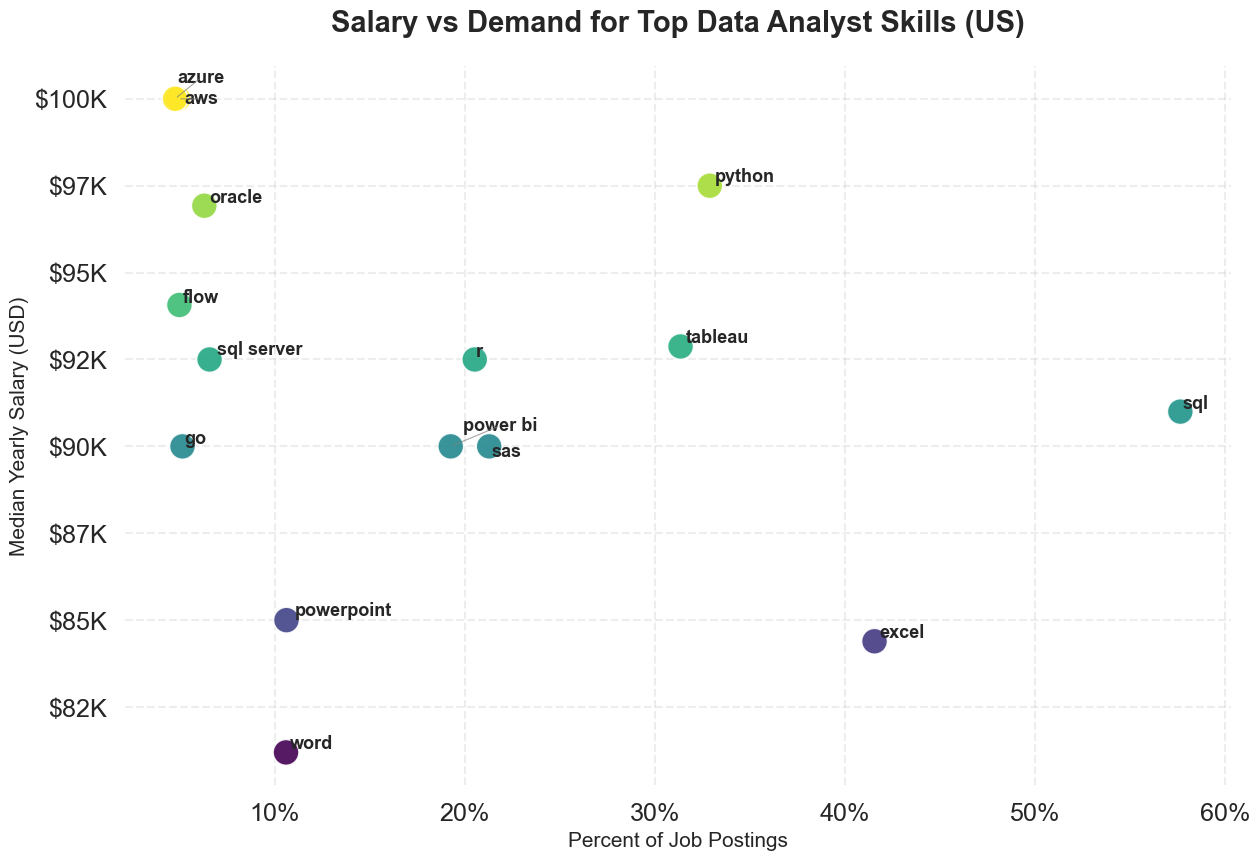

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter
from adjustText import adjust_text

# --- STYLE ---
sns.set_theme(
    style="white",
    context="talk",
    font_scale=1.1
)

plt.figure(figsize=(13, 9))

# --- SCATTER PLOT ---
sns.scatterplot(
    data=df_plot,
    x="skill_percent",
    y="median_salary",
    hue="median_salary",
    palette="viridis",
    s=350,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.2,
    legend=False
)

# --- ADD TEXT LABELS ---
texts = []
for _, row in df_plot.iterrows():
    texts.append(
        plt.text(
            row["skill_percent"],
            row["median_salary"],
            row["job_skills"],
            fontsize=13,
            weight="bold"
        )
    )

# --- AUTOMATIC LABEL ADJUSTMENT (KEY PART) ---
adjust_text(
    texts,
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4),
    arrowprops=dict(
        arrowstyle="-",
        color="gray",
        lw=0.8,
        alpha=0.7
    )
)

# --- TITLES ---
plt.title(
    "Salary vs Demand for Top Data Analyst Skills (US)",
    fontsize=21,
    weight="bold",
    pad=25
)

plt.xlabel("Percent of Job Postings", fontsize=15)
plt.ylabel("Median Yearly Salary (USD)", fontsize=15)

# --- AXIS FORMATTING ---
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

def currency_formatter(x, pos):
    return f"${int(x/1000)}K"

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# --- GRID & CLEANUP ---
plt.grid(True, linestyle="--", alpha=0.35)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()
